In [1]:
#import optimize_na_ga_v2 as opt
import numpy as np
import time
import generalized_genSim_shorten_time as ggsd
from neuron import h, gui
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import bluepyopt.deapext.algorithms as algo
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
import numpy as np
from deap import tools
import random
from deap import base, creator
import multiprocessing
import eval_helper as eh
import scoring_functions_relative as sf
import curve_fitting as cf

In [2]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('params_na12mut8st.csv', 'A427D', 'na12mut8st')

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:148: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:156: RuntimeWarning: overflow encountered in exp
  norm_g.append(1 / (1 + np.exp(-(volt - self.v_half) / self.s)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1466: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1466: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: overflow encountered in exp
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


In [3]:
gen_counter = 0
best_indvs = []
cp_freq = 1
old_update = algo._update_history_and_hof
def my_update(halloffame, history, population):
    global gen_counter,cp_freq
    #old_update(halloffame, history, population)
    if halloffame is not None:
        halloffame.update(population)
    #print('hof: ' + str(halloffame))
    #print('population: ' + str(population))
    
    if halloffame:
        best_indvs.append(halloffame[0])
    gen_counter = gen_counter+1
    print("Current generation: ", gen_counter)
    if gen_counter%cp_freq == 0:
        fn = '.pkl'
        save_logs(fn,best_indvs,population)

def my_record_stats(stats, logbook, gen, population, invalid_count):
    '''Update the statistics with the new population'''
    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=gen, nevals=invalid_count, **record)
    print('log: \n', logbook, '\n')
    output = open("log.pkl", 'wb')
    pickle.dump(logbook, output)
    output.close()

def save_logs(fn, best_indvs, hof):
    output = open("indv"+fn, 'wb')
    pickle.dump(best_indvs, output)
    output.close()
    output = open("hof"+fn, 'wb')
    pickle.dump(hof, output)


In [6]:
#hof = tools.HallOfFame(1, similar=np.array_equal)
hof = tools.ParetoFront()
algo._update_history_and_hof = my_update
algo._record_stats = my_record_stats
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=100, hof = hof, map_function=pool.map)
#deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=5, hof = hof)
cp_file = './cp.pkl'

/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shor

Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow 

Very bad voltages in Recovery.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very ba

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1481: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad 

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: invalid value encountered in add
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very ba

/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: invalid value encountered in add
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: invalid value encountered in add
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: Runti

Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: invalid value encountered in add
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: invalid value encountered in add
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in a

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in act

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
V

/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:701: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.

/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: overflow encountered in multiply
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in activation.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: invalid value encountered in add
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.
Very bad voltages in Recovery.


In [7]:
start_time = time.time()
pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=cp_file)
#pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=None)
end_time = time.time()
print(end_time - start_time)

Current generation:  6
log: 
 gen	nevals	avg    	std    	min     	max    
1  	100   	809.659	8035.04	0.677603	80757.3 

Current generation:  7
log: 
 gen	nevals	avg    	std    	min     	max    
1  	100   	809.659	8035.04	0.677603	80757.3
2  	100   	405.948	5695.95	0.677603	80757.3 

Current generation:  8
log: 
 gen	nevals	avg    	std    	min     	max    
1  	100   	809.659	8035.04	0.677603	80757.3
2  	100   	405.948	5695.95	0.677603	80757.3
3  	100   	2.02508	1.01492	0.676877	4.16524 

Current generation:  9
log: 
 gen	nevals	avg    	std     	min     	max    
1  	100   	809.659	8035.04 	0.677603	80757.3
2  	100   	405.948	5695.95 	0.677603	80757.3
3  	100   	2.02508	1.01492 	0.676877	4.16524
4  	100   	2.06919	0.868471	0.676206	4.16699 

Current generation:  10
log: 
 gen	nevals	avg    	std     	min     	max    
1  	100   	809.659	8035.04 	0.677603	80757.3
2  	100   	405.948	5695.95 	0.677603	80757.3
3  	100   	2.02508	1.01492 	0.676877	4.16524
4  	100   	2.06919	0.868471	0.676206	4.1

In [ ]:
best_indvs[len(best_indvs) - 2]

In [8]:
best_indvs


[[177.07877059101526,
  0.1575371711142293,
  0.10623472439675243,
  0.5502781685483232,
  88.18038962344583,
  0.1811390626890042,
  2.530917619798051,
  0.5112432241018967,
  45.58948532943745,
  0.4779115763960727,
  0.8007537916134362,
  0.14361541133753256,
  12.706046671925339,
  0.5495919568066042,
  0.3163170449594038,
  4.9192862450002846,
  74.97801530447279,
  0.05413249628010159,
  19.512310116056174,
  8.999327493949094],
 [176.08273742743214,
  0.1575371711142293,
  0.09138602212815672,
  0.4691934469515772,
  165.77185793950014,
  0.17970348213610018,
  2.530917619798051,
  0.5339169611674588,
  45.58948532943745,
  0.4779115763960727,
  2.6763357556419054,
  0.18271472035845684,
  14.628033639942682,
  2.002783424329518,
  0.3163170449594038,
  4.544562416202837,
  604.645009436201,
  0.05413249628010159,
  19.512310116056174,
  2.593552589404935],
 [378.71711363675746,
  0.006646487013189711,
  0.048673284086041095,
  0.4188953651036408,
  32.294772069818244,
  0.08465

In [3]:
evaluator.evaluate_with_lists([418.3611219993537,
  0.2115275517229868,
  0.026332822206897595,
  0.5507355767848516,
  105.66265911924611,
  0.015363036884766288,
  2.6234903170323998,
  0.26639297470250645,
  651.9655266161324,
  0.09439134942304682,
  1.9799983102015244,
  0.22652816644623222,
  19.410397601945355,
  0.9614451016312084,
  0.23151900068836512,
  1.562393482710427,
  322.7036486422808,
  0.07809653656493677,
  16.200129103506054,
  5.457601729441812])

[5.464920292611532e-08, 2.899387419476558e-07, 1.5382546207721782e-06, 8.161084458983696e-06, 4.3296733563129396e-05, 0.00022966599824935258, 0.001217278631275346, 0.006424544659654193, 0.03316768616509347, 0.15398085586219198, 0.4912562828680732, 0.8366836380871296, 0.9645142058475614, 0.9931131265550877, 0.99869463015933, 0.9997536960607083]
gv_slope: 5.992562251154763
v_half_act: -19.79038955240266


(0.025821656272221456,
 0.0655116213151928,
 0.022179916784926007,
 0.032882349021316704,
 0.7359820962177448,
 0.08309165284127605)

In [4]:
evaluator.evaluate_with_lists([1000,10,4320,130,0,0,0,0,0,0,0,0,0,1000,0,0,0,0,0,0])

[5.464920292611532e-08, 2.899387419476558e-07, 1.5382546207721782e-06, 8.161084458983696e-06, 4.3296733563129396e-05, 0.00022966599824935258, 0.001217278631275346, 0.006424544659654193, 0.03316768616509347, 0.15398085586219198, 0.4912562828680732, 0.8366836380871296, 0.9645142058475614, 0.9931131265550877, 0.99869463015933, 0.9997536960607083]
gv_slope: 5.992562251154763
v_half_act: -19.79038955240266


(0.025821656272221456,
 0.0655116213151928,
 0.022179916784926007,
 0.032882349021316704,
 0.7359820962177448,
 0.08309165284127605)

In [9]:
log

[{'gen': 1,
  'nevals': 100,
  'avg': 520.1151709392983,
  'std': 499.480019574254,
  'min': 0.0,
  'max': 1000.0}]

In [3]:
best_indvs = [[58.30035693274327, 1.7330556641407107, -1.956314890670824, 1.0008060614355943, 4.2247900083185765, 0.0005307888382927407, 0.2528382057960039, 0.9000225798255164, -4.634741698486584, 6.04876972220221, 4.974042475543028, 1.6822064984267422, 0.37975555118428816, 9.527026622992052, 12.030407620656316, 9.744858305023271, -46.2529697949836, -45.61038369955437, -44.91573511750018, -27.215573849998542, 2.2093841761314517, -59.06744905035774, -60.10306479537742, 7.29574963966907], [58.30035693274327, 1.7330556641407107, -1.956314890670824, 1.0008060614355943, 4.2247900083185765, 0.0005307888382927407, 0.2528382057960039, 0.9000225798255164, -4.634741698486584, 6.04876972220221, 4.974042475543028, 1.6822064984267422, 0.37975555118428816, 9.527026622992052, 12.030407620656316, 9.744858305023271, -46.2529697949836, -45.61038369955437, -44.91573511750018, -27.215573849998542, 2.2093841761314517, -59.06744905035774, -60.10306479537742, 7.29574963966907], [58.30035693274327, 1.7330556641407107, -1.956314890670824, 1.0008060614355943, 4.2247900083185765, 0.0005307888382927407, 0.2528382057960039, 0.9000225798255164, -4.634741698486584, 6.04876972220221, 4.974042475543028, 1.6822064984267422, 0.37975555118428816, 9.527026622992052, 12.030407620656316, 9.744858305023271, -46.2529697949836, -45.61038369955437, -44.91573511750018, -27.215573849998542, 2.2093841761314517, -59.06744905035774, -60.10306479537742, 7.29574963966907], [58.57211136879646, -2.99141591696617, 0.4378525833750069, 1.3152139966092369, 3.407512894405712, 0.00039232594554019953, 3.647091945876057, 2.0374341363388773, -1.2552309484601791, 6.499547270129048, 3.6594342643057733, 2.970378042337644, 0.538845865097282, 11.864134037922364, 14.960382314970357, 10.228341283797056, -46.75605328096658, -44.36395908654087, -49.545939608138426, -26.702830052604146, -0.9116486232444663, -58.379093967497, -63.063418171368355, 15.102029533838506], [52.50593018674539, 3.9728180160307236, 2.809219790589104, 1.0253410244973744, 2.0412737504373086, 0.00026301309314909275, -2.961395756010794, 2.2957609078361942, -4.726435991545121, 6.363227803228395, 2.975427210303446, 2.9243730632630283, 0.2922326119081728, 11.440412845050787, 13.736821089614583, 6.1554105974258375, -44.615091655881585, -47.47563437235654, -49.75724257317084, -31.969156188925584, 3.9849181721640594, -59.74854977192689, -63.37242730765314, 8.405977477110621], [52.50593018674539, 3.9728180160307236, 2.809219790589104, 1.0253410244973744, 2.0412737504373086, 0.00026301309314909275, -2.961395756010794, 2.2957609078361942, -4.726435991545121, 6.363227803228395, 2.975427210303446, 2.9243730632630283, 0.2922326119081728, 11.440412845050787, 13.736821089614583, 6.1554105974258375, -44.615091655881585, -47.47563437235654, -49.75724257317084, -31.969156188925584, 3.9849181721640594, -59.74854977192689, -63.37242730765314, 8.405977477110621], [52.50593018674539, 3.9728180160307236, 2.809219790589104, 1.0253410244973744, 2.0412737504373086, 0.00026301309314909275, -2.961395756010794, 2.2957609078361942, -4.726435991545121, 6.363227803228395, 2.975427210303446, 2.9243730632630283, 0.2922326119081728, 11.440412845050787, 13.736821089614583, 6.1554105974258375, -44.615091655881585, -47.47563437235654, -49.75724257317084, -31.969156188925584, 3.9849181721640594, -59.74854977192689, -63.37242730765314, 8.405977477110621], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291], [58.90312980960611, -0.08846235706475225, 2.2700143250806932, 1.5797403454541354, 3.455674988160199, 0.0003516960089202955, -3.9816268481557073, 4.2926547109058095, 3.3486172619819206, 6.403414085306484, 4.7537880368529555, 2.951914516118788, 0.7228895509575473, 11.572045913231232, 14.114600706350043, 5.14402312650676, -46.83916942143177, -46.30465738156748, -48.43978047769934, -26.26972941346428, 3.2512546173197405, -62.57215812363639, -57.81416438722742, 8.354541422632291]]

In [4]:
len(best_indvs)

25

Generation: 1


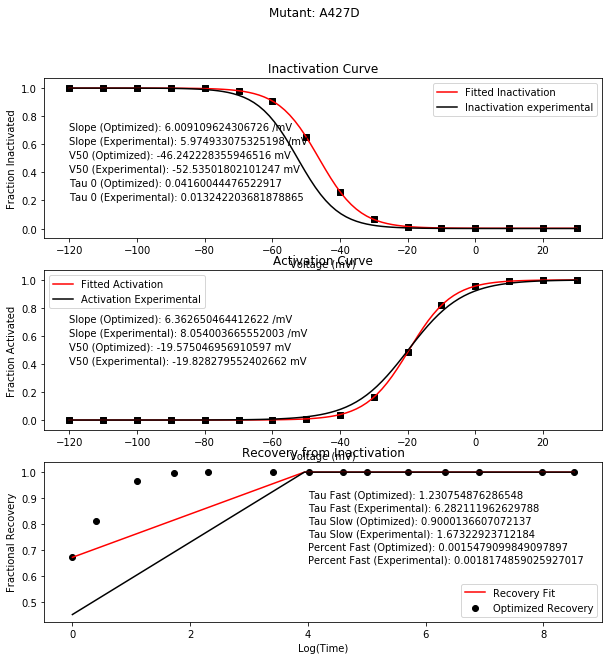

Generation: 2


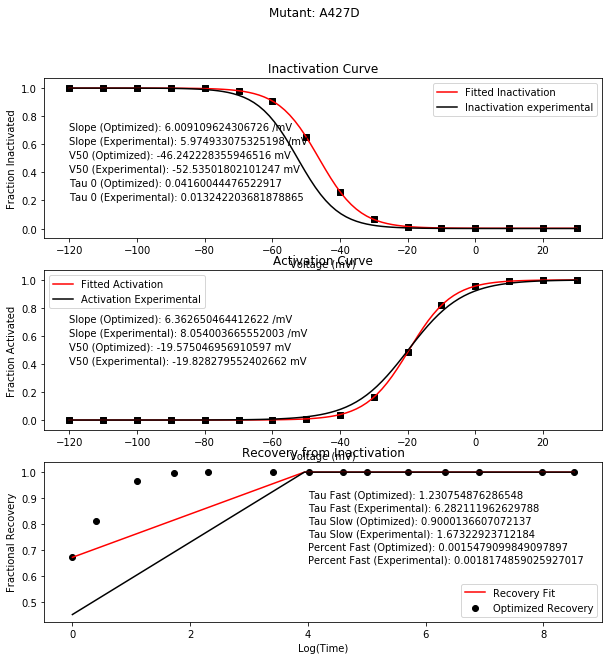

Generation: 3


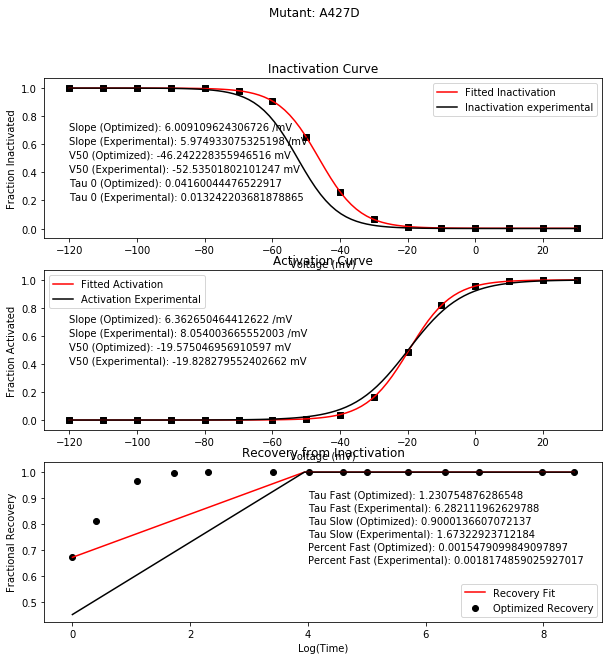

Generation: 4


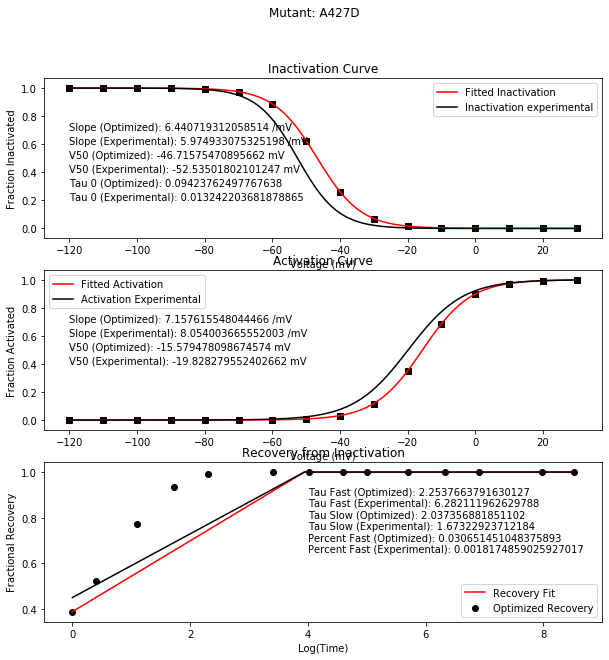

Generation: 5


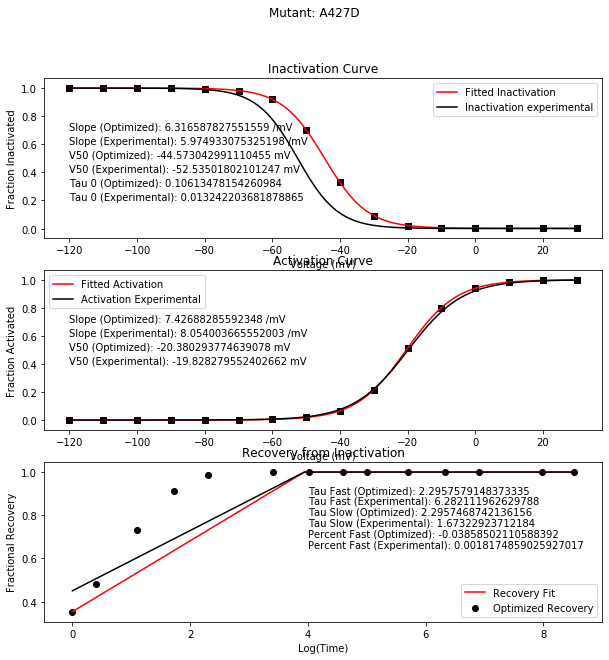

Generation: 6


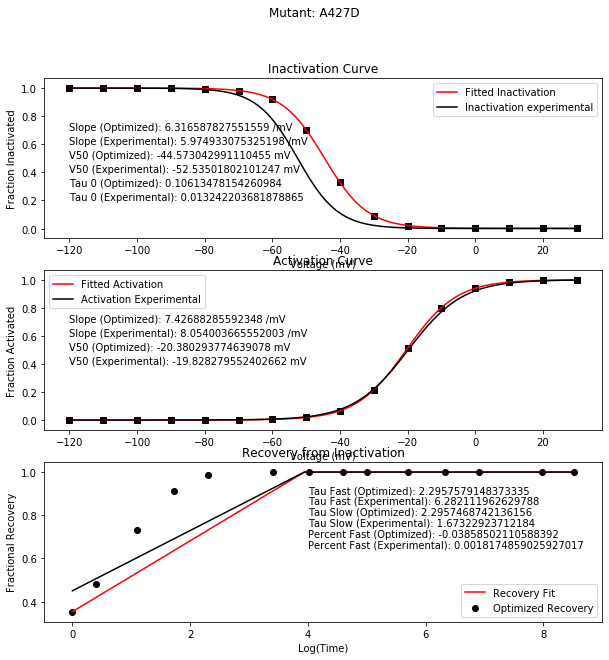

Generation: 7


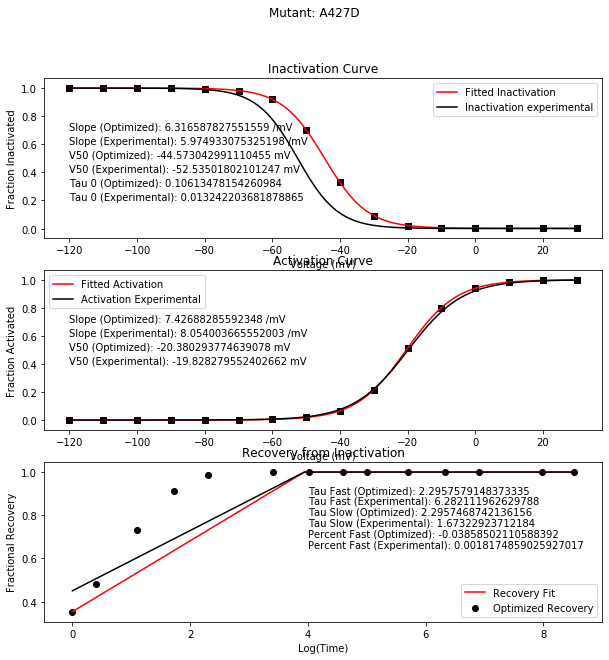

Generation: 8


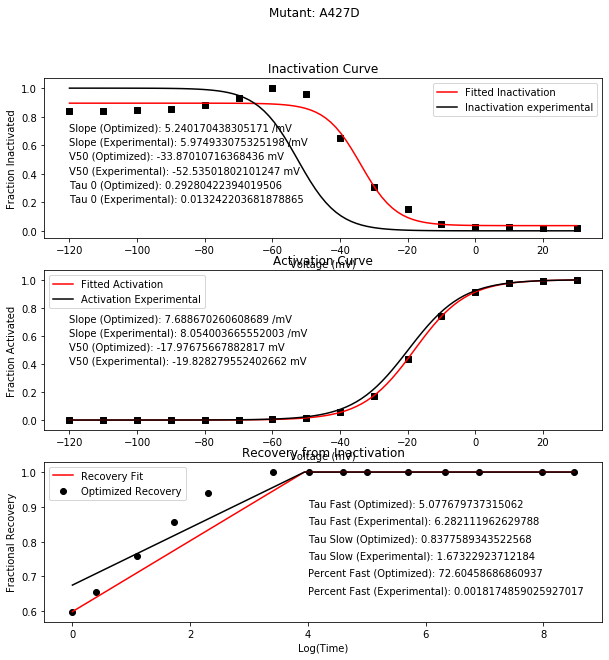

Generation: 9


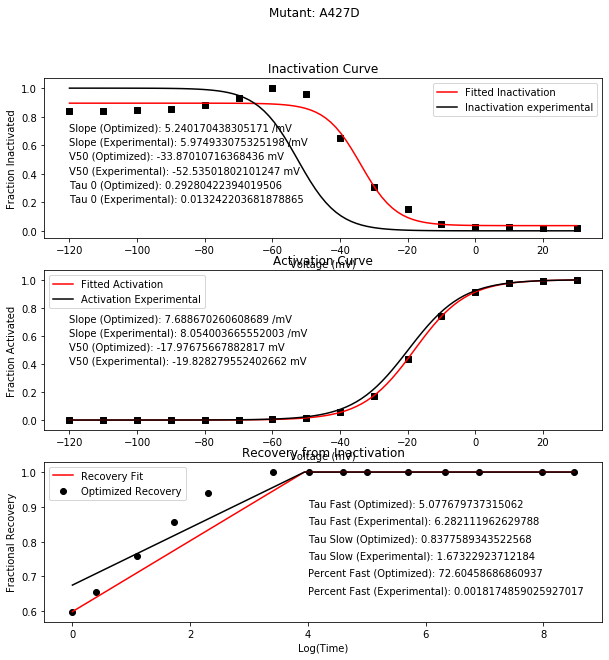

Generation: 10


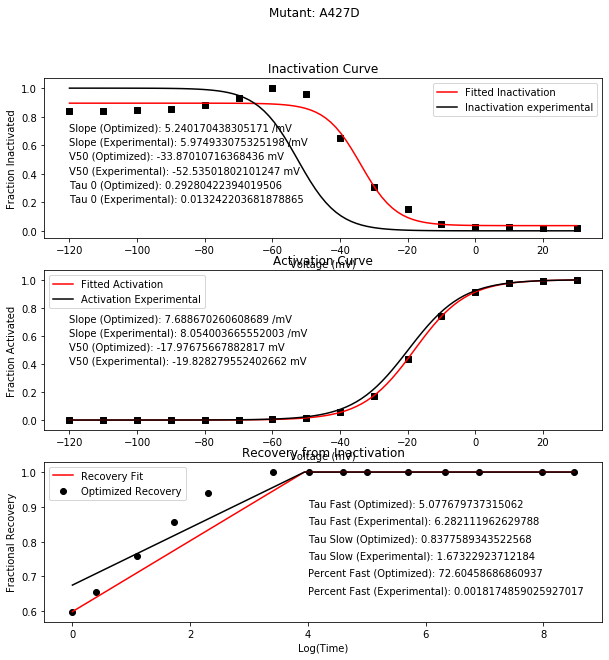

Generation: 11


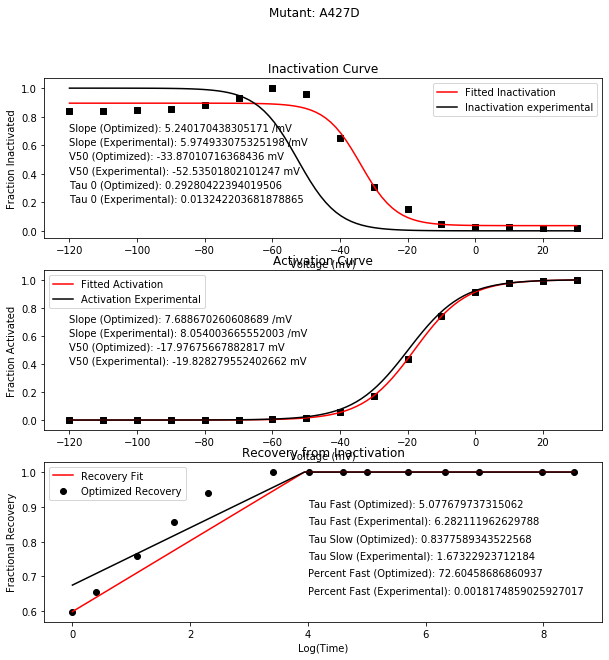

Generation: 12


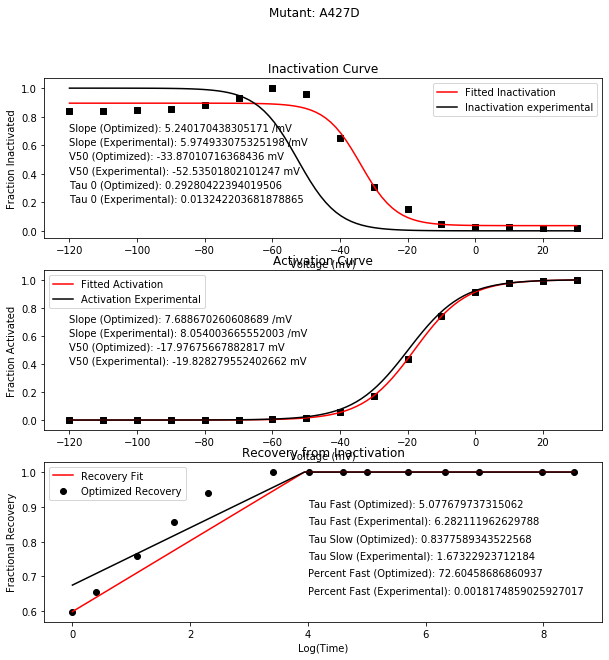

Generation: 13


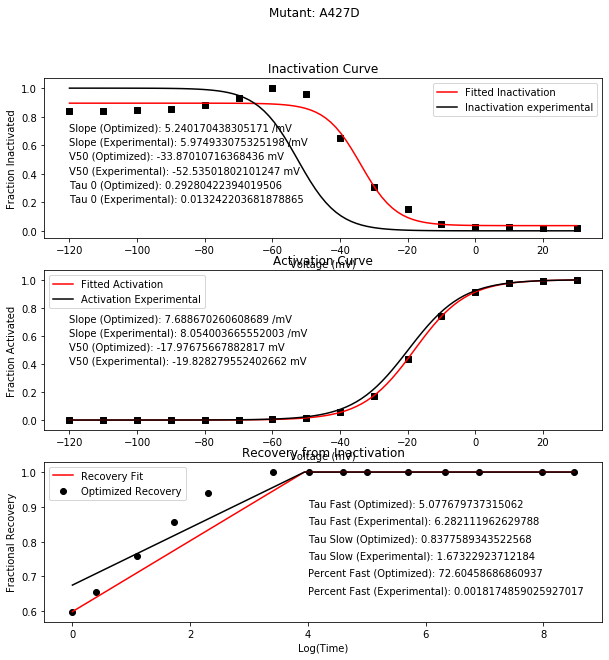

Generation: 14


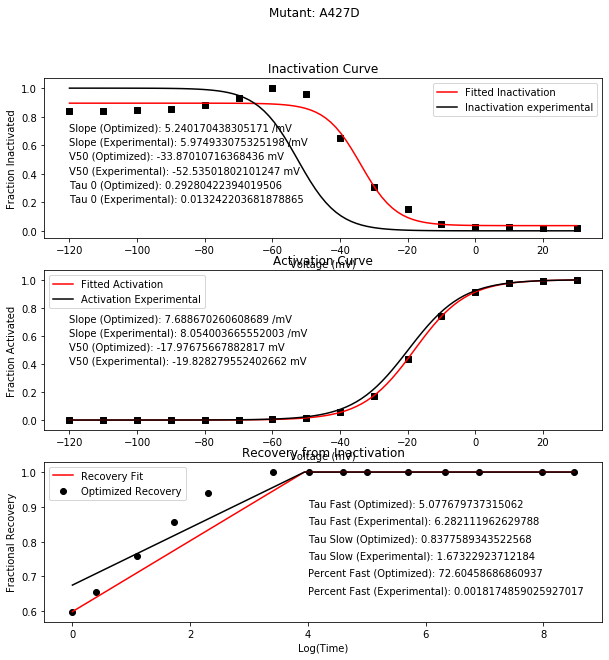

Generation: 15


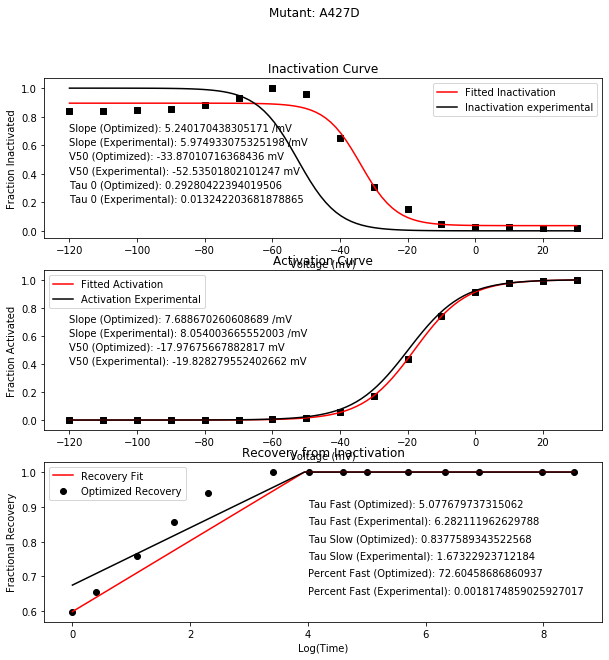

Generation: 16


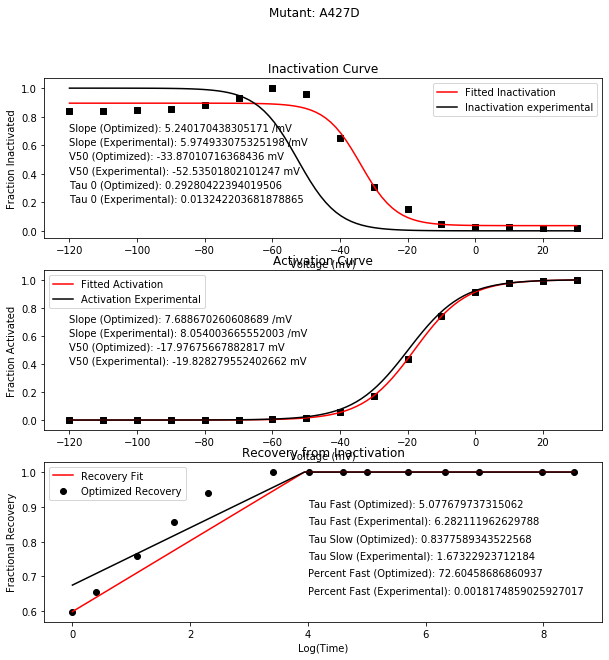

Generation: 17


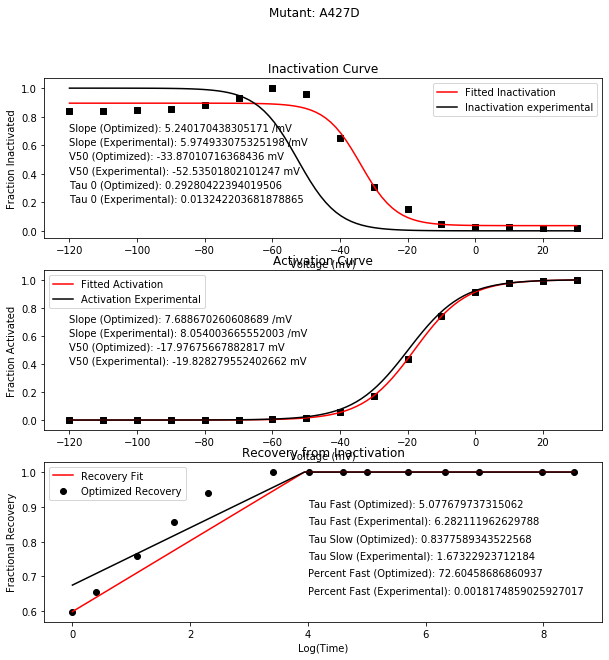

Generation: 18


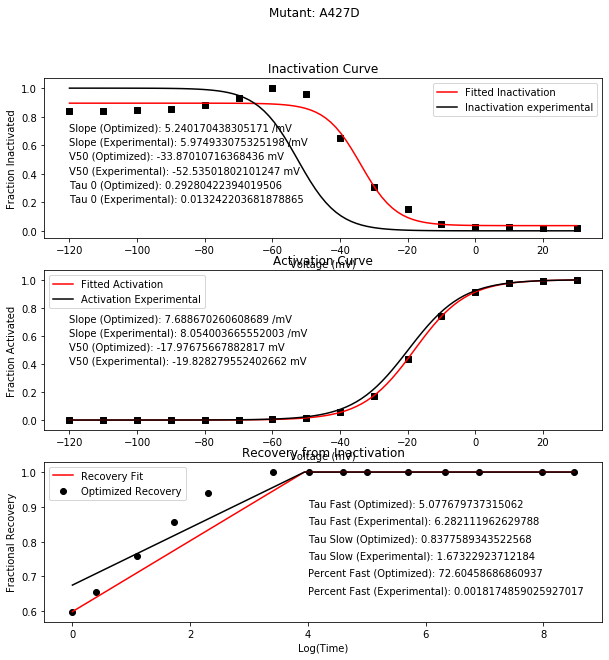

Generation: 19


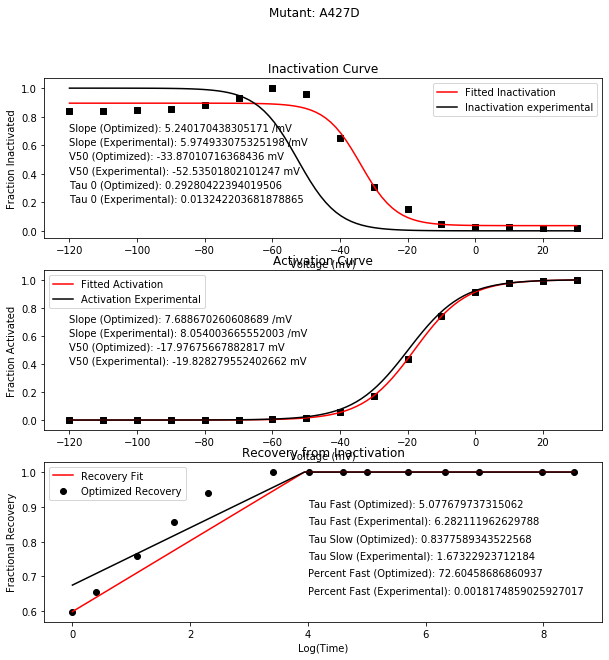

Generation: 20


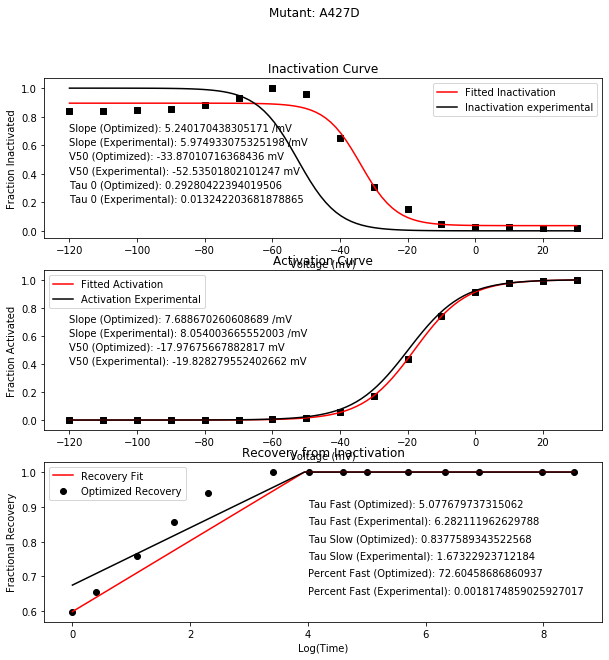

Generation: 21


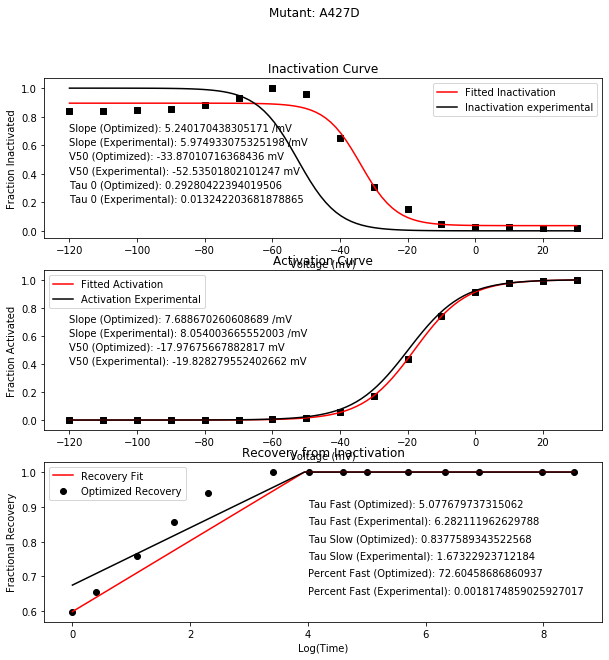

Generation: 22


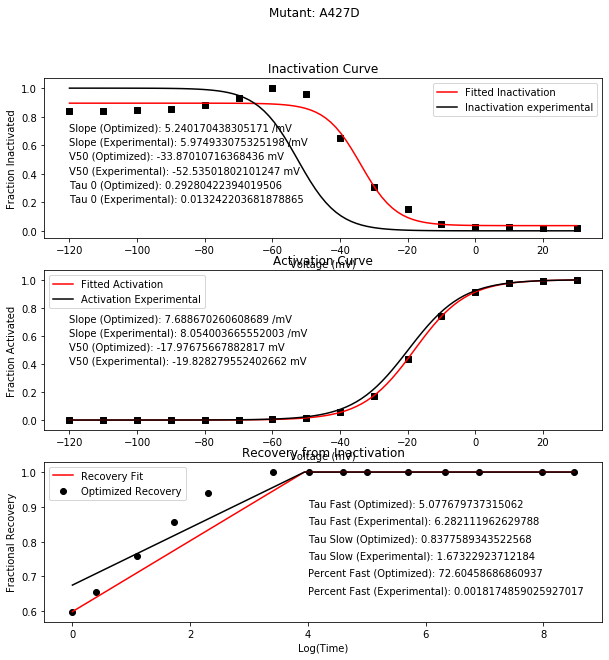

Generation: 23


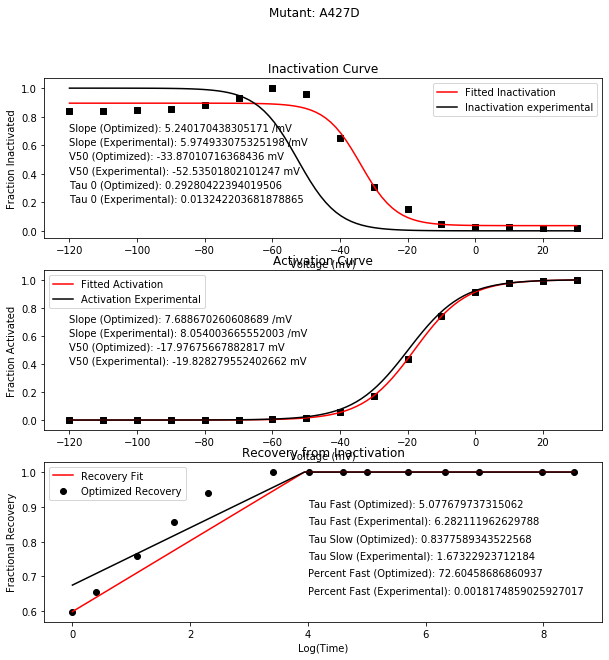

Generation: 24


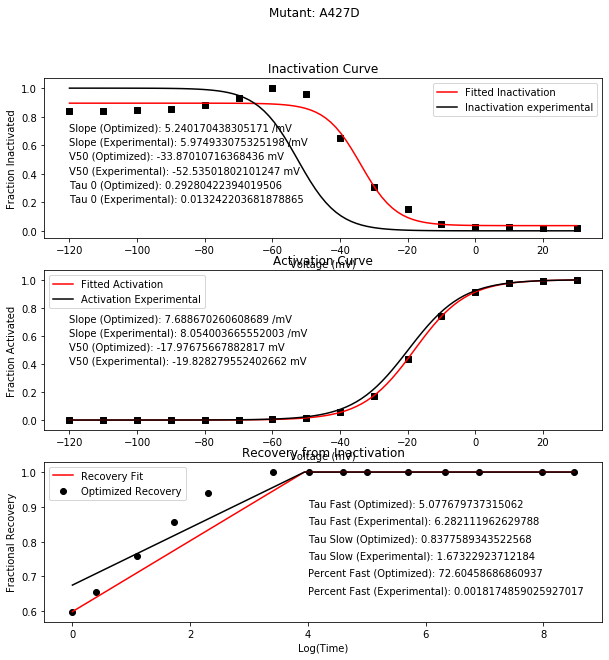

Generation: 25


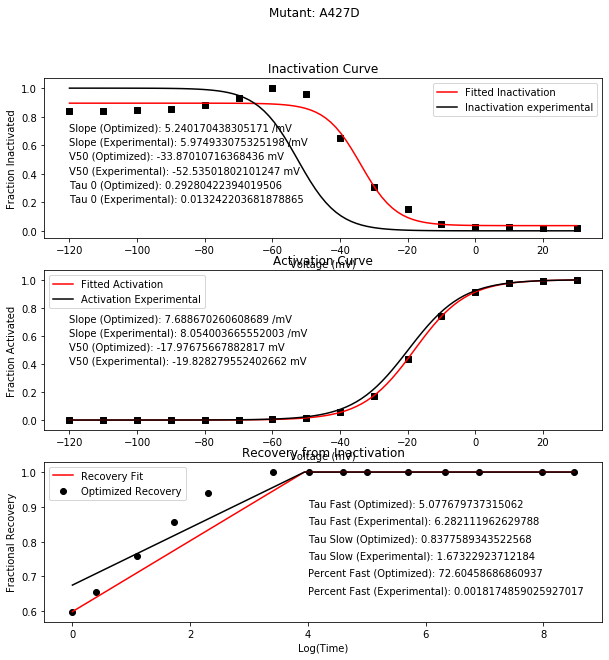

In [6]:
for i in range(1, 26):
    print('Generation: ' + str(i))
    evaluator.plot_data(best_indvs[i - 1], 'A427D')